In [319]:
# Importing libraries
import glob
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import texthero as hero
from texthero import preprocessing
sb.set() # set the default Seaborn style for graphics
from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib.dates as mdates

In [320]:
# Datasets
steamData = pd.read_csv('steam_data/steam.csv')
steamSupportInfo = pd.read_csv('steam_data/steam_support_info.csv')
steamChart = pd.read_csv('steam_data/steamCharts.csv')
steamSpyTagData = pd.read_csv('steam_data/steamspy_tag_data.csv')
steamGames = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_games/steam_games*.csv"))))
steamMediaData = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_media_data/steam_media_data*.csv"))))
steamRequirements = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_requirements/steam_requirements*.csv"))))
steamDescription = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_description/steam_description*.csv"))))

#game reviews
steam_HalfOfTheGameReviews = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_reviews/steam_review_*.csv"))))
files = glob.glob("steam_data/steam_reviews" + '**/**' + "/*.csv")
steamReviews_fromFolder = pd.concat([pd.read_csv(f) for f in files ])
steamReviewsDF = [steam_HalfOfTheGameReviews, steamReviews_fromFolder]
steamCombinedReviews = pd.concat(steamReviewsDF)

C:\Users\justi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\justi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (1,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\justi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (3,4,7,12,13,14,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\justi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\justi\anaconda3\lib\site-packages\IP

In [321]:
# SteamGames Data
steamData

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19


In [322]:
# Renaming titles and columns for matching

steamData = steamData.rename(columns={"name":"title"})

#create a custom cleaning pipeline
custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_whitespace]

steamCombinedReviews['title'] = hero.clean(steamCombinedReviews['title'], pipeline = custom_pipeline)
steamData['title'] = hero.clean(steamData['title'], pipeline = custom_pipeline)

In [323]:
# Creating dataframe for title and game details
tags = pd.DataFrame(steamData[['title','categories','positive_ratings']])
tags

,title,categories,positive_ratings
0,counter strike,Multi-player;Online Multi-Player;Local Multi-P...,124534
1,team fortress classic,Multi-player;Online Multi-Player;Local Multi-P...,3318
2,day of defeat,Multi-player;Valve Anti-Cheat enabled,3416
3,deathmatch classic,Multi-player;Online Multi-Player;Local Multi-P...,1273
4,half life opposing force,Single-player;Multi-player;Valve Anti-Cheat en...,5250
...,...,...,...
27070,room of pandora,Single-player;Steam Achievements,3
27071,cyber gun,Single-player,8
27072,super star blast,Single-player;Multi-player;Co-op;Shared/Split ...,0
27073,new yankee 7 deer hunters,Single-player;Steam Cloud,2


In [324]:
# Sorting the games  tags and steamCombinedReviews
match_title = tags.title.isin(steamCombinedReviews.title)
steamUniqueTitle = tags[match_title]
steamUniqueTitle = steamUniqueTitle.drop_duplicates(['title'])
steamUniqueTitle = steamUniqueTitle.reset_index(drop=True)

nan_value = float("NaN")
steamUniqueTitle.replace("", nan_value, inplace=True)
steamUniqueTitle.dropna(subset = ["title"], inplace=True)
steamUniqueTitle = steamUniqueTitle.rename(columns={"categories":"game_details"})
steamUniqueTitle

,title,game_details,positive_ratings
0,counter strike,Multi-player;Online Multi-Player;Local Multi-P...,124534
1,counter strike source,Multi-player;Cross-Platform Multiplayer;Steam ...,76640
2,left 4 dead 2,Single-player;Multi-player;Co-op;Steam Achieve...,251789
3,portal 2,Single-player;Co-op;Steam Achievements;Full co...,138220
4,sid meier s civilization(r) iii complete,Single-player;Multi-player;Includes level editor,2578
...,...,...,...
119,atlas,Online Multi-Player;MMO;Co-op;Online Co-op;Ste...,8621
120,hitman(tm) 2,Single-player;Online Multi-Player;Online Co-op...,10814
121,football manager 2019,Single-player;Multi-player;Steam Achievements;...,2963
122,among us,Multi-player;Online Multi-Player;Local Multi-P...,60


In [325]:
steamUniqueTitle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             124 non-null    object
 1   game_details      124 non-null    object
 2   positive_ratings  124 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.9+ KB


In [326]:
# Filtering games with multiplayer in game details
multi2 = steamUniqueTitle[steamUniqueTitle['game_details'].str.contains('Multi-player', regex = False)]
multi1 = steamUniqueTitle[steamUniqueTitle['game_details'].str.contains('Online Multi-Player', regex = False)]

multi = pd.concat([multi1, multi2])
multi = multi.drop_duplicates(['title'])
multi = multi.reset_index(drop=True)
nan_value = float("NaN")
multi.replace("", nan_value, inplace=True)
multi.dropna(subset = ["title"], inplace=True)
multi

,title,game_details,positive_ratings
0,counter strike,Multi-player;Online Multi-Player;Local Multi-P...,124534
1,star wars(tm) empire at war gold pack,Single-player;Multi-player;Online Multi-Player...,6526
2,final fantasy xiv online,Single-player;Multi-player;Online Multi-Player...,9808
3,terraria,Single-player;Multi-player;Online Multi-Player...,255600
4,arma 3,Single-player;Multi-player;Online Multi-Player...,105034
...,...,...,...
75,dark souls(tm) remastered,Single-player;Multi-player;Steam Achievements;...,8669
76,monster hunter world,Single-player;Multi-player;Co-op;Steam Achieve...,72029
77,total war warhammer ii,Single-player;Multi-player;Steam Achievements;...,19420
78,farming simulator 19,Single-player;Multi-player;Co-op;Cross-Platfor...,5738


In [327]:
# Solely multiplayer games
only_multi = multi[~multi.game_details.str.contains("Single-player")]
only_multi

,title,game_details,positive_ratings
0,counter strike,Multi-player;Online Multi-Player;Local Multi-P...,124534
6,dayz,Multi-player;Online Multi-Player;Steam Worksho...,118435
10,rust,Multi-player;Online Multi-Player;MMO;Co-op;Onl...,220370
15,dead by daylight,Multi-player;Online Multi-Player;Co-op;Online ...,140721
19,squad,Multi-player;Online Multi-Player;Steam Trading...,23539
20,rising storm 2 vietnam,Multi-player;Online Multi-Player;Steam Achieve...,17201
28,playerunknown s battlegrounds,Multi-player;Online Multi-Player;Stats,496184
29,insurgency sandstorm,Multi-player;Online Multi-Player;Online Co-op;...,12858
30,black desert online,Online Multi-Player;MMO;Online Co-op;Steam Tra...,10337
31,hunt showdown,Online Multi-Player;Online Co-op,20679


In [339]:
# Filtering games with single player 
single = steamUniqueTitle[steamUniqueTitle['game_details'].str.contains('Single-player', regex = False)]


nan_value = float("NaN")
single.replace("", nan_value, inplace=True)
single.dropna(subset = ["title"], inplace=True)
single.reset_index(level = 0, inplace = True)
single

C:\Users\justi\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-339-29e3dba93401>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single.dropna(subset = ["title"], inplace=True)


,index,title,game_details,positive_ratings
0,2,left 4 dead 2,Single-player;Multi-player;Co-op;Steam Achieve...,251789
1,3,portal 2,Single-player;Co-op;Steam Achievements;Full co...,138220
2,4,sid meier s civilization(r) iii complete,Single-player;Multi-player;Includes level editor,2578
3,5,garry s mod,Single-player;Multi-player;Co-op;Cross-Platfor...,363721
4,6,star wars(tm) empire at war gold pack,Single-player;Multi-player;Online Multi-Player...,6526
...,...,...,...,...
102,117,sekiro(tm) shadows die twice,Single-player;Steam Achievements;Full controll...,21504
103,118,green hell,Single-player,2767
104,120,hitman(tm) 2,Single-player;Online Multi-Player;Online Co-op...,10814
105,121,football manager 2019,Single-player;Multi-player;Steam Achievements;...,2963


In [342]:
# Solely singleplayer games
only_single1 = single[~single.game_details.str.contains("Multi-player")]
only_single = pd.DataFrame(only_single1[~only_single1.game_details.str.contains("Online Multi-Player")])
only_single.reset_index(level = 0, inplace = True)
only_single

,level_0,index,title,game_details,positive_ratings
0,1,3,portal 2,Single-player;Co-op;Steam Achievements;Full co...,138220
1,6,8,the sims(tm) 3,Single-player,11679
2,8,10,borderlands 2,Single-player;Co-op;Steam Achievements;Full co...,144595
3,9,11,the elder scrolls v skyrim,Single-player;Steam Achievements;Steam Trading...,237303
4,12,14,batman(tm) arkham knight,Single-player;Steam Achievements;Full controll...,33121
5,14,16,ftl faster than light,Single-player;Steam Trading Cards,42641
6,17,19,kerbal space program,Single-player;Steam Trading Cards;Steam Worksh...,49328
7,19,22,euro truck simulator 2,Single-player;Steam Achievements;Steam Trading...,176769
8,21,24,kenshi,Single-player;Steam Workshop;Includes level ed...,9512
9,22,25,mad max,Single-player;Steam Achievements;Full controll...,36222


In [330]:
# Games with both single and multiplayer aspects
match_title2 = multi.title.isin(single.title)
multi_single = multi[match_title2]
multi_single = multi_single.drop_duplicates(['title'])
multi_single = multi_single.reset_index(drop=True)

nan_value = float("NaN")
multi_single.replace("", nan_value, inplace=True)
multi_single.dropna(subset = ["title"], inplace=True)
multi_single

,title,game_details,positive_ratings
0,star wars(tm) empire at war gold pack,Single-player;Multi-player;Online Multi-Player...,6526
1,final fantasy xiv online,Single-player;Multi-player;Online Multi-Player...,9808
2,terraria,Single-player;Multi-player;Online Multi-Player...,255600
3,arma 3,Single-player;Multi-player;Online Multi-Player...,105034
4,starbound,Single-player;Multi-player;Online Multi-Player...,74162
...,...,...,...
59,dark souls(tm) remastered,Single-player;Multi-player;Steam Achievements;...,8669
60,monster hunter world,Single-player;Multi-player;Co-op;Steam Achieve...,72029
61,total war warhammer ii,Single-player;Multi-player;Steam Achievements;...,19420
62,farming simulator 19,Single-player;Multi-player;Co-op;Cross-Platfor...,5738


,Type of Game,Count
0,Single/Multiplayer,64
1,Singleplayer,43
2,Multiplayer,16


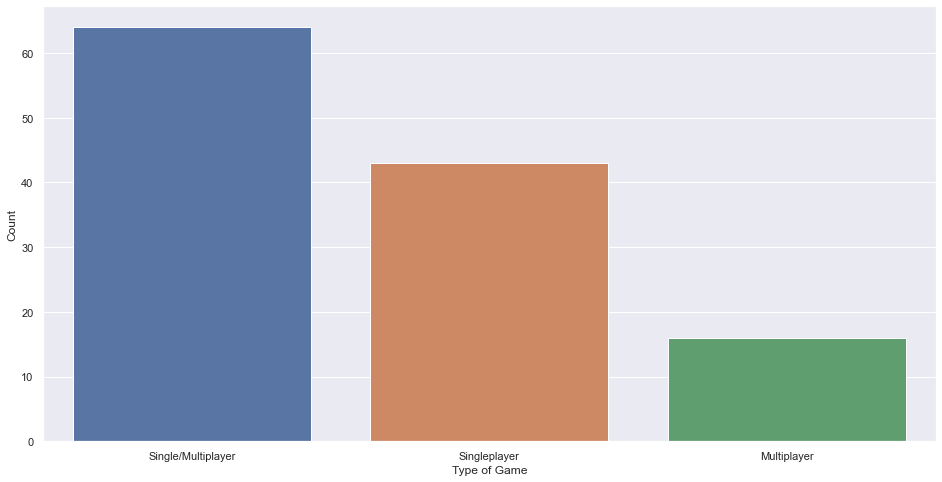

In [358]:
# Ploting bar graph for each type of game
data = [['Single/Multiplayer', len(multi_single)],['Singleplayer', len(only_single)],
        ['Multiplayer', len(only_multi)]]
gamesGraph = pd.DataFrame(data, columns = ['Type of Game', 'Count'])

f, axes = plt.subplots(figsize = [16,8])
sb.barplot(x = 'Type of Game', y = 'Count', data = gamesGraph)

gamesGraph

In [332]:
steamUniqueTitle.positive_ratings.describe()

count       124.000000
mean      50919.258065
std       74141.334795
min          60.000000
25%       10784.250000
50%       24243.000000
75%       55622.750000
max      496184.000000
Name: positive_ratings, dtype: float64

<AxesSubplot:>

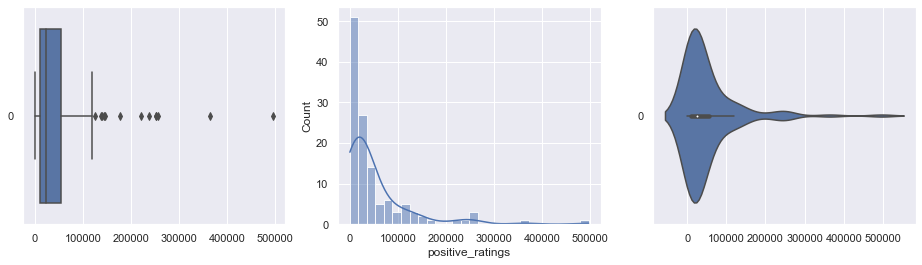

In [333]:
# Visualization of ratings data
f, axes = plt.subplots(1,3,figsize=(16, 4))
sb.boxplot(data = steamUniqueTitle.positive_ratings, orient = "h", ax=axes[0])
sb.histplot(data = steamUniqueTitle.positive_ratings, kde=True, ax=axes[1])
sb.violinplot(data =steamUniqueTitle.positive_ratings, orient = "h", ax = axes[2])

<AxesSubplot:>

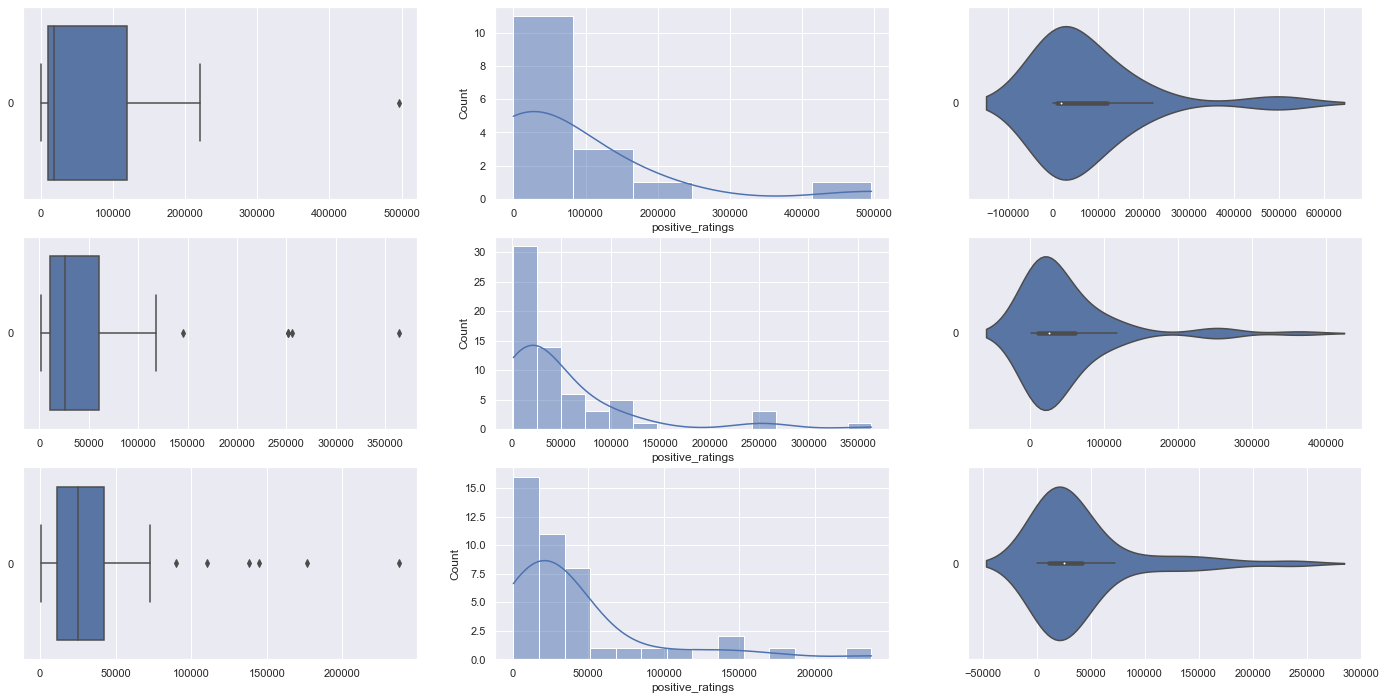

In [343]:
# Visualization of ratings for each type of game
f, axes = plt.subplots(3,3,figsize=(24, 12))
sb.boxplot(data = only_multi.positive_ratings, orient = "h", ax=axes[0,0])
sb.histplot(data = only_multi.positive_ratings, kde=True, ax=axes[0,1])
sb.violinplot(data = only_multi.positive_ratings, orient = "h", ax = axes[0,2])

sb.boxplot(data = multi_single.positive_ratings, orient = "h", ax=axes[1,0])
sb.histplot(data = multi_single.positive_ratings, kde=True, ax=axes[1,1])
sb.violinplot(data = multi_single.positive_ratings, orient = "h", ax = axes[1,2])

sb.boxplot(data = only_single.positive_ratings, orient = "h", ax=axes[2,0])
sb.histplot(data = only_single.positive_ratings, kde=True, ax=axes[2,1])
sb.violinplot(data = only_single.positive_ratings, orient = "h", ax = axes[2,2])

In [352]:
# Average Ratings
MeanRatings = pd.DataFrame([['Multiplayer', only_multi.positive_ratings.mean()],
                            ['Singleplayer', only_single.positive_ratings.mean()],
                            ['Both', multi_single.positive_ratings.mean()]], columns = ['Type of Game', 'Average Ratings'])
MeanRatings

,Type of Game,Average Ratings
0,Multiplayer,80682.87500
1,Singleplayer,41095.00000
2,Both,50347.78125


<AxesSubplot:xlabel='Type of Game', ylabel='Average Ratings'>

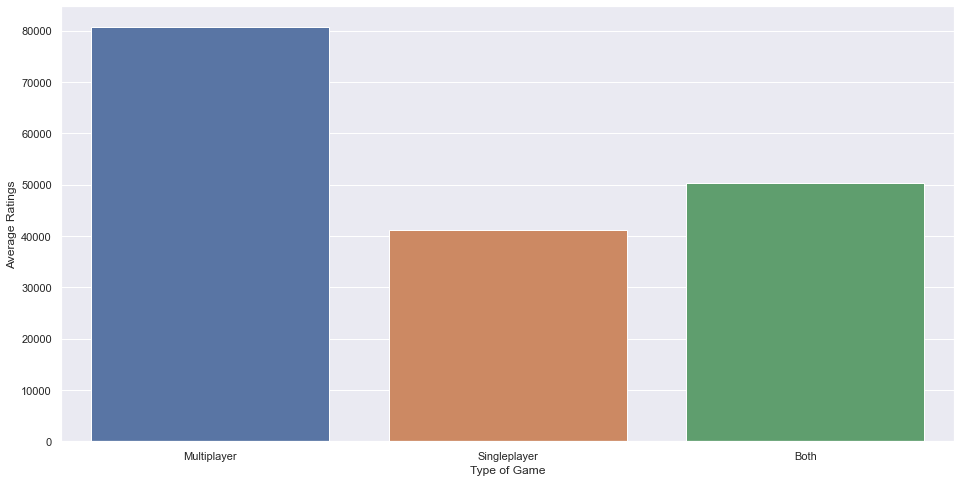

In [355]:
f, axes = plt.subplots(figsize = [16,8])
sb.barplot(x = 'Type of Game', y = 'Average Ratings', data = MeanRatings)

# Conclusion

From our results,even tho more people are willing to try out singleplayer game as seen in the first bar graph, Multiplayer Games still garner the most number of positive ratings on average from gamers. Hence, creating a multiplayer game will increase the chances of it being played.